# Rainbow DQN vs Modern PPO Comparison

Complete implementation of Rainbow DQN and modern PPO with all advanced features on CartPole environment.

## Reinforcement Learning Fundamentals

**Core Objective:** Maximize expected cumulative reward
$$J(\pi) = \mathbb{E}_{\tau \sim \pi}[\sum_{t=0}^{\infty} \gamma^t r_t]$$

**Two Main Approaches:**

1. **Value-Based Methods** (like DQN): Learn value functions $Q(s,a)$ or $V(s)$, derive policy implicitly
   - Use Bellman equations for value function learning
   - Policy: $\pi(s) = \arg\max_a Q(s,a)$ (ε-greedy for exploration)

2. **Policy-Based Methods** (like PPO): Learn policy $\pi_\theta(a|s)$ directly
   - Use policy gradients: $\nabla_\theta J(\pi_\theta) = \mathbb{E}[\nabla_\theta \log \pi_\theta(a|s) A(s,a)]$
   - Often combined with value function (Actor-Critic)

**Rainbow DQN Features:**
- Double DQN
- Dueling DQN  
- Prioritized Experience Replay
- Multi-step returns
- Distributional RL (C51)
- Noisy Networks

**Modern PPO Features:**
- Clipped objective
- Old policy storage
- Multiple epochs per batch
- GAE (λ-return)
- Entropy regularization
- Mini-batch training
- Advantage normalization
- Proper batching

## Complete Mathematical Foundations

### Reinforcement Learning Core Concepts

**The RL Problem:**
Learn optimal policy $\pi^*(a|s)$ that maximizes expected return:
$$J(\pi) = \mathbb{E}_{\tau \sim \pi}\left[\sum_{t=0}^{\infty} \gamma^t R_t\right]$$

**Value Functions:**
- State value: $V^\pi(s) = \mathbb{E}_{\pi}[\sum_{t=0}^{\infty} \gamma^t R_t | S_0 = s]$
- Action value: $Q^\pi(s,a) = \mathbb{E}_{\pi}[\sum_{t=0}^{\infty} \gamma^t R_t | S_0 = s, A_0 = a]$
- Advantage: $A^\pi(s,a) = Q^\pi(s,a) - V^\pi(s)$

**Bellman Equations:**
$$V^\pi(s) = \sum_a \pi(a|s) \sum_{s',r} p(s',r|s,a)[r + \gamma V^\pi(s')]$$
$$Q^\pi(s,a) = \sum_{s',r} p(s',r|s,a)[r + \gamma \sum_{a'} \pi(a'|s') Q^\pi(s',a')]$$

### Rainbow DQN Mathematical Framework

**1. Standard DQN Loss:**
$$L(\theta) = \mathbb{E}_{(s,a,r,s') \sim \mathcal{D}}[(Q_\theta(s,a) - y)^2]$$
Where $y = r + \gamma \max_{a'} Q_{\theta^-}(s', a')$

**2. Double DQN (Reduces overestimation bias):**
$$Q_{target} = r + \gamma Q_{\theta^-}(s', \arg\max_{a'} Q_\theta(s', a'))$$
Action selection with online network, evaluation with target network.

**3. Dueling DQN (Separates state value and advantage):**
$$Q(s,a) = V(s) + A(s,a) - \frac{1}{|A|}\sum_{a'}A(s,a')$$
Where $V(s)$ is state value and $A(s,a)$ is advantage function.

**4. Multi-step Returns (Better credit assignment):**
$$R_t^{(n)} = \sum_{k=0}^{n-1} \gamma^k r_{t+k+1} + \gamma^n Q(s_{t+n}, a_{t+n})$$

**5. Distributional RL (C51) - Models full return distribution:**

**Value Distribution:**
$$Z^\pi(s,a) = \sum_{k=0}^{\infty} \gamma^k R_{t+k+1}$$

**Categorical Distribution with N atoms:**
$$z_i = V_{min} + i \cdot \frac{V_{max} - V_{min}}{N-1}, \quad i = 0, 1, ..., N-1$$
$$p_i(s,a) = P(Z(s,a) = z_i)$$

**Categorical Projection:**
$$\Phi \hat{T} Z_j(s,a) = \sum_{i=0}^{N-1} [1 - \frac{|\hat{T}z_j - z_i|}{\Delta z}]_0^1 \cdot p_i(s,a)$$

**Expected Q-Value Recovery:**
$$Q(s,a) = \sum_{i=0}^{N-1} z_i \cdot p_i(s,a)$$

**6. Noisy Networks (Parametric noise for exploration):**
$$y = (\mu^w + \sigma^w \odot \epsilon^w) x + \mu^b + \sigma^b \odot \epsilon^b$$

**Factorized Gaussian Noise:**
$$\epsilon^w_{i,j} = f(\epsilon_i) \cdot f(\epsilon_j)$$
Where $f(x) = \text{sgn}(x)\sqrt{|x|}$

**7. Prioritized Experience Replay:**
$$P(i) = \frac{p_i^\alpha}{\sum_k p_k^\alpha}$$
Where $p_i = |\delta_i| + \epsilon$ and $\delta_i$ is TD error.

**Importance Sampling Weights:**
$$w_i = \left(\frac{1}{N} \cdot \frac{1}{P(i)}\right)^\beta$$

### Modern PPO Mathematical Framework

**1. Policy Gradient Theorem:**
$$\nabla_\theta J(\pi_\theta) = \mathbb{E}_{s \sim d^\pi, a \sim \pi_\theta}[\nabla_\theta \log \pi_\theta(a|s) A^\pi(s,a)]$$

**2. Importance Sampling Ratio:**
$$r_t(\theta) = \frac{\pi_\theta(a_t|s_t)}{\pi_{\theta_{old}}(a_t|s_t)}$$

**3. PPO Clipped Objective:**
$$L^{CLIP}(\theta) = \mathbb{E}_t[\min(r_t(\theta)\hat{A}_t, \text{clip}(r_t(\theta), 1-\epsilon, 1+\epsilon)\hat{A}_t)]$$

**4. Generalized Advantage Estimation (GAE):**
$$\hat{A}_t^{GAE(\gamma,\lambda)} = \sum_{l=0}^{\infty}(\gamma\lambda)^l \delta_{t+l}$$
Where $\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$ is the TD error.

**5. Value Function Loss:**
$$L^{VF} = \mathbb{E}_t[(V_\theta(s_t) - V_t^{target})^2]$$

**6. Entropy Regularization:**
$$H(\pi_\theta(s)) = -\sum_{a} \pi_\theta(a|s) \log \pi_\theta(a|s)$$

**7. Total PPO Loss:**
$$L_{total} = L^{CLIP} + c_1 L^{VF} + c_2 S[\pi_\theta](s_t)$$

### Network Architecture Mathematics

**Rainbow DQN Forward Pass:**

Standard Q-learning: $Q(s) = f_\theta(s) \in \mathbb{R}^{|A|}$

Dueling architecture: $Q(s,a) = V_\theta(s) + A_\theta(s,a) - \frac{1}{|A|}\sum_{a'}A_\theta(s,a')$

Distributional: $Z_\theta(s,a) = \text{softmax}(f_\theta(s,a)) \in \mathbb{R}^{N_{atoms}}$

**PPO Network Forward Pass:**

Actor (policy): $\pi_\theta(a|s) = \text{softmax}(f^{actor}_\theta(s))$

Critic (value): $V_\theta(s) = f^{critic}_\theta(s) \in \mathbb{R}$

### Advanced PPO Features

**1. Advantage Normalization:**
$$\hat{A}_t^{norm} = \frac{\hat{A}_t - \mu_{\mathcal{B}}}{\sigma_{\mathcal{B}} + \epsilon}$$

**2. Mini-batch Training:**
Split batch $\mathcal{B}$ into mini-batches: $\mathcal{B} = \bigcup_{i=1}^{\lceil N/M \rceil} \mathcal{B}_i$

**3. Multiple Epochs per Batch:**
Train for $K$ epochs: $\theta_{k+1} = \theta_k - \alpha \nabla_\theta L^{CLIP}(\theta_k)$

**4. Gradient Clipping:**
$$\hat{g} = \min\left(1, \frac{\tau}{||\nabla_\theta L||_2}\right) \nabla_\theta L$$

### Advanced Rainbow DQN Features

**1. Target Network Updates:**
Hard: $\theta^- \leftarrow \theta$ every $C$ steps
Soft: $\theta^- \leftarrow \tau \theta + (1-\tau)\theta^-$ every step

**2. Multi-step with Importance Sampling:**
$$G_t^{(n)} = \sum_{k=0}^{n-1} \gamma^k \prod_{j=1}^k \rho_{t+j} R_{t+k+1} + \gamma^n Q_{\theta^-}(S_{t+n}, A_{t+n})$$

**3. Distributional Bellman Operator:**
$$(\mathcal{T} Z)(s,a) = R(s,a) + \gamma Z(S',A')$$

**4. Categorical Cross-Entropy Loss:**
$$L = -\sum_{i=0}^{N-1} m_i \log p_i$$
Where $m_i$ is projected target distribution and $p_i$ is predicted distribution.

### Key Algorithmic Differences

**Value-Based (Rainbow DQN):**
- **Purely value-based**: Learns only Q-function $Q(s,a)$, derives policy via $\pi(s) = \arg\max_a Q(s,a)$
- **Off-policy**: Can use any collected experience from replay buffer
- **Sample efficient**: Reuses experience multiple times
- **Exploration**: External mechanisms (ε-greedy or noisy networks)
- **No explicit policy representation**: Policy is implicit through value function

**Actor-Critic (PPO):**
- **Hybrid approach**: Learns both policy $\pi_\theta(a|s)$ and value function $V_\phi(s)$ explicitly
- **On-policy**: Requires fresh experience collected under current policy
- **Policy gradients**: Direct optimization of policy parameters
- **Natural exploration**: Stochastic policy provides exploration
- **Dual networks**: Separate actor (policy) and critic (value) components

**Fundamental Difference:**
- **Rainbow DQN**: $Q(s,a) \rightarrow \pi(s) = \arg\max_a Q(s,a)$ (value-to-policy)
- **PPO**: $\pi_\theta(a|s) + V_\phi(s) \rightarrow$ policy gradients with value-based advantages (explicit dual learning)

In [1]:
import gymnasium as gym
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from collections import deque, namedtuple
import random
import time
import math

def count_parameters(model):
    """Count the number of trainable parameters in a model"""
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

# Experience tuple for prioritized replay
Experience = namedtuple(
    "Experience", ["state", "action", "reward", "next_state", "done"]
)

In [2]:
# Configuration System with Flaggable Features
CONFIG = {
    # Environment
    "environment": "CartPole-v1",
    "episodes": 1000,
    "device": "cuda",  # 'auto', 'cuda', 'cpu'
    # Rainbow DQN Configuration with Flaggable Features
    "rainbow": {
        "lr": 0.001,
        "batch_size": 32,
        "hidden_size": 64,
        "gamma": 0.99,
        "update_freq": 1,
        "target_update_freq": 100,
        "memory_capacity": 10000,
        "warmup_steps": 200,
        "epsilon_start": 1.0,
        "epsilon_end": 0.01,
        "epsilon_decay_episodes": 1000,  # Episodes over which to decay epsilon
        # Flaggable Rainbow DQN Features - OPTIMIZED FOR CARTPOLE
        "use_double_dqn": True,           # helps stability
        "use_dueling": True,              # good for value estimation
        "use_prioritized_replay": False,   # helps with learning efficiency
        "use_multi_step": False,           # improves learning with multi-step returns
        "use_distributional": False,      # helps with value distribution learning
        "use_noisy_networks": False,      # can be used for exploration
        "use_target_updates": True,       # essential for stability
        "use_gradient_clipping": True,    # helps training stability
        # Multi-step and Distributional parameters
        "n_step": 3,
        "num_atoms": 51,
        "v_min": -10,
        "v_max": 10,
    },
    # PPO Configuration with Flaggable Features
    "ppo": {
        "lr": 3e-4,
        "hidden_size": 64,
        "gamma": 0.99,
        "update_frequency": 1024,
        "mini_batch_size": 64,
        # Flaggable PPO Features
        "use_clipped_objective": True,          # Clipped Objective
        "use_old_policy_storage": True,         # Old Policy Storage
        "use_multiple_epochs": True,            # Multiple Epochs per Batch
        "use_gae": True,                        # Generalized Advantage Estimation
        "use_entropy_regularization": True,     # Entropy Regularization
        "use_mini_batch_training": True,        # Mini-batch Training
        "use_advantage_normalization": True,    # Advantage Normalization
        "use_gradient_clipping": True,          # Gradient Clipping
        "use_adam_eps": True,                   # Adam with eps stability
        # PPO-specific parameters
        "gae_lambda": 0.95,
        "clip_ratio": 0.2,
        "entropy_coef": 0.01,
        "value_coef": 0.5,
        "max_grad_norm": 0.5,
        "ppo_epochs": 4,
        "adam_eps": 1e-5,
    },
}

# Device setup
if CONFIG["device"] == "auto":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
else:
    device = torch.device(CONFIG["device"])


print(f"Using device: {device}")
print(f"Episodes: {CONFIG['episodes']}")

Using device: cuda
Episodes: 1000


In [3]:
# Unified DQN Network (handles all Rainbow features)
class RainbowDQN(nn.Module):
    def __init__(self, state_size, action_size, config):
        super(RainbowDQN, self).__init__()
        self.state_size = state_size
        self.action_size = action_size
        self.config = config
        hidden_size = config['hidden_size']
        
        # Distributional RL parameters
        if config['use_distributional']:
            self.num_atoms = config['num_atoms']
            self.v_min = config['v_min']
            self.v_max = config['v_max']
            self.register_buffer('supports', torch.linspace(config['v_min'], config['v_max'], self.num_atoms))
            output_size = action_size * self.num_atoms if config['use_dueling'] else self.num_atoms
        else:
            output_size = action_size
        
        # Network layers (noisy or regular)
        if config['use_noisy_networks']:
            self.fc1 = NoisyLinear(state_size, hidden_size)
            self.fc2 = NoisyLinear(hidden_size, hidden_size)
            
            if config['use_dueling']:
                if config['use_distributional']:
                    self.value_stream = NoisyLinear(hidden_size, self.num_atoms)
                    self.advantage_stream = NoisyLinear(hidden_size, action_size * self.num_atoms)
                else:
                    self.value_stream = NoisyLinear(hidden_size, 1)
                    self.advantage_stream = NoisyLinear(hidden_size, action_size)
            else:
                self.fc3 = NoisyLinear(hidden_size, output_size)
        else:
            self.fc1 = nn.Linear(state_size, hidden_size)
            self.fc2 = nn.Linear(hidden_size, hidden_size)
            
            if config['use_dueling']:
                if config['use_distributional']:
                    self.value_stream = nn.Linear(hidden_size, self.num_atoms)
                    self.advantage_stream = nn.Linear(hidden_size, action_size * self.num_atoms)
                else:
                    self.value_stream = nn.Linear(hidden_size, 1)
                    self.advantage_stream = nn.Linear(hidden_size, action_size)
            else:
                self.fc3 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, log=False):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        
        if self.config['use_dueling']:
            value = self.value_stream(x)
            advantage = self.advantage_stream(x)
            
            if self.config['use_distributional']:
                value = value.view(-1, 1, self.num_atoms)
                advantage = advantage.view(-1, self.action_size, self.num_atoms)
                q_atoms = value + advantage - advantage.mean(dim=1, keepdim=True)
                
                if log:
                    return F.log_softmax(q_atoms, dim=-1)
                else:
                    return F.softmax(q_atoms, dim=-1)
            else:
                q_values = value + advantage - advantage.mean(dim=1, keepdim=True)
                return q_values
        else:
            output = self.fc3(x)
            if self.config['use_distributional']:
                output = output.view(-1, self.action_size, self.num_atoms)
                if log:
                    return F.log_softmax(output, dim=-1)
                else:
                    return F.softmax(output, dim=-1)
            return output
    
    def reset_noise(self):
        if self.config['use_noisy_networks']:
            self.fc1.reset_noise()
            self.fc2.reset_noise()
            if self.config['use_dueling']:
                self.value_stream.reset_noise()
                self.advantage_stream.reset_noise()
            else:
                self.fc3.reset_noise()

# Noisy Linear Layer
class NoisyLinear(nn.Module):
    def __init__(self, in_features, out_features, std_init=0.5):
        super(NoisyLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.std_init = std_init
        
        self.weight_mu = nn.Parameter(torch.empty(out_features, in_features))
        self.weight_sigma = nn.Parameter(torch.empty(out_features, in_features))
        self.register_buffer('weight_epsilon', torch.empty(out_features, in_features))
        
        self.bias_mu = nn.Parameter(torch.empty(out_features))
        self.bias_sigma = nn.Parameter(torch.empty(out_features))
        self.register_buffer('bias_epsilon', torch.empty(out_features))
        
        self.reset_parameters()
        self.reset_noise()
    
    def reset_parameters(self):
        mu_range = 1 / math.sqrt(self.in_features)
        self.weight_mu.data.uniform_(-mu_range, mu_range)
        self.weight_sigma.data.fill_(self.std_init / math.sqrt(self.in_features))
        self.bias_mu.data.uniform_(-mu_range, mu_range)
        self.bias_sigma.data.fill_(self.std_init / math.sqrt(self.out_features))
    
    def _scale_noise(self, size):
        x = torch.randn(size, device=self.weight_mu.device)
        return x.sign().mul_(x.abs().sqrt_())
    
    def reset_noise(self):
        epsilon_in = self._scale_noise(self.in_features)
        epsilon_out = self._scale_noise(self.out_features)
        self.weight_epsilon.copy_(epsilon_out.ger(epsilon_in))
        self.bias_epsilon.copy_(epsilon_out)
    
    def forward(self, input):
        if self.training:
            weight = self.weight_mu + self.weight_sigma * self.weight_epsilon
            bias = self.bias_mu + self.bias_sigma * self.bias_epsilon
        else:
            weight = self.weight_mu
            bias = self.bias_mu
        
        return F.linear(input, weight, bias)

# PPO Network
class PPONetwork(nn.Module):
    def __init__(self, state_size, action_size, config):
        super(PPONetwork, self).__init__()
        hidden_size = config['hidden_size']
        
        self.shared = nn.Sequential(
            nn.Linear(state_size, hidden_size),
            nn.Tanh(),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
        )
        
        self.actor = nn.Linear(hidden_size, action_size)
        self.critic = nn.Linear(hidden_size, 1)
    
    def forward(self, x):
        shared_features = self.shared(x)
        return self.actor(shared_features), self.critic(shared_features)
    
    def get_action_and_value(self, x, action=None):
        logits, value = self.forward(x)
        probs = F.softmax(logits, dim=-1)
        
        if action is None:
            action = torch.multinomial(probs, 1)
        
        log_prob = F.log_softmax(logits, dim=-1).gather(-1, action)
        entropy = -(probs * F.log_softmax(logits, dim=-1)).sum(-1)
        
        return action, log_prob, entropy, value

In [4]:
# Prioritized Experience Replay Buffer
class PrioritizedReplayBuffer:
    def __init__(self, capacity, alpha=0.6, beta_start=0.4, beta_frames=100000):
        self.tree = SumTree(capacity)
        self.capacity = capacity
        self.alpha = alpha
        self.beta_start = beta_start
        self.beta_frames = beta_frames
        self.frame = 1
        
    def beta_by_frame(self, frame_idx):
        return min(1.0, self.beta_start + frame_idx * (1.0 - self.beta_start) / self.beta_frames)
    
    def push(self, state, action, reward, next_state, done):
        max_prio = self.tree.tree.max() if self.tree.entries > 0 else 1.0
        experience = Experience(state, action, reward, next_state, done)
        self.tree.add(max_prio, experience)
    
    def sample(self, batch_size):
        batch = []
        idxs = []
        priorities = []
        segment = self.tree.total() / batch_size
        
        beta = self.beta_by_frame(self.frame)
        self.frame += 1
        
        for i in range(batch_size):
            a = segment * i
            b = segment * (i + 1)
            s = random.uniform(a, b)
            (idx, p, data) = self.tree.get(s)
            priorities.append(p)
            batch.append(data)
            idxs.append(idx)
        
        sampling_probabilities = np.array(priorities) / self.tree.total()
        is_weight = np.power(self.tree.entries * sampling_probabilities, -beta)
        is_weight /= is_weight.max()
        
        return batch, idxs, is_weight
    
    def update_priorities(self, idxs, priorities):
        for idx, priority in zip(idxs, priorities):
            self.tree.update(idx, priority ** self.alpha)
    
    def __len__(self):
        return self.tree.entries

class SumTree:
    def __init__(self, capacity):
        self.capacity = capacity
        self.tree = np.zeros(2 * capacity - 1)
        self.data = np.zeros(capacity, dtype=object)
        self.entries = 0
        self.next_idx = 0
    
    def _propagate(self, idx, change):
        parent = (idx - 1) // 2
        self.tree[parent] += change
        if parent != 0:
            self._propagate(parent, change)
    
    def _retrieve(self, idx, s):
        left = 2 * idx + 1
        right = left + 1
        
        if left >= len(self.tree):
            return idx
        
        if s <= self.tree[left]:
            return self._retrieve(left, s)
        else:
            return self._retrieve(right, s - self.tree[left])
    
    def total(self):
        return self.tree[0]
    
    def add(self, p, data):
        idx = self.next_idx + self.capacity - 1
        self.data[self.next_idx] = data
        self.update(idx, p)
        
        self.next_idx += 1
        if self.next_idx >= self.capacity:
            self.next_idx = 0
        
        if self.entries < self.capacity:
            self.entries += 1
    
    def update(self, idx, p):
        change = p - self.tree[idx]
        self.tree[idx] = p
        self._propagate(idx, change)
    
    def get(self, s):
        idx = self._retrieve(0, s)
        dataIdx = idx - self.capacity + 1
        return (idx, self.tree[idx], self.data[dataIdx])

In [5]:
# Rainbow DQN Agent with Flaggable Features
class RainbowDQNAgent:
    def __init__(self, state_size, action_size, config, device):
        self.state_size = state_size
        self.action_size = action_size
        self.device = device
        self.config = config
        
        # Basic parameters
        self.gamma = config['gamma']
        self.update_freq = config['update_freq']
        self.batch_size = config['batch_size']
        self.warmup_steps = config['warmup_steps']
        
        if config['use_target_updates']:
            self.target_update_freq = config['target_update_freq']
        
        # Epsilon for exploration (if not using noisy networks)
        if not config['use_noisy_networks']:
            self.epsilon = config['epsilon_start']
            self.epsilon_start = config['epsilon_start']
            self.epsilon_end = config['epsilon_end']
            self.epsilon_decay_episodes = config['epsilon_decay_episodes']
            self.current_episode = 0
        
        # Networks
        self.q_network = RainbowDQN(state_size, action_size, config).to(device)
        if config['use_target_updates']:
            self.target_network = RainbowDQN(state_size, action_size, config).to(device)
            self.target_network.load_state_dict(self.q_network.state_dict())
        
        self.optimizer = optim.Adam(self.q_network.parameters(), lr=config['lr'])
        
        # Memory
        if config['use_prioritized_replay']:
            self.memory = PrioritizedReplayBuffer(config['memory_capacity'])
        else:
            self.memory = deque(maxlen=config['memory_capacity'])
        
        if config['use_multi_step']:
            self.n_step_buffer = deque(maxlen=config['n_step'])
        
        # Distributional RL support
        if config['use_distributional']:
            self.supports = torch.linspace(config['v_min'], config['v_max'], config['num_atoms']).to(device)
            self.delta_z = (config['v_max'] - config['v_min']) / (config['num_atoms'] - 1)
        
        self.update_count = 0
        self.step_count = 0
        self.losses = []
        self.q_values = []
        
        # Print enabled features
        features = [k.replace('use_', '') for k, v in config.items() if k.startswith('use_') and v]
        print(f"Rainbow DQN Features: {', '.join(features)}")
        if not config['use_noisy_networks']:
            print(f"Epsilon decay: {self.epsilon_start} → {self.epsilon_end} over {self.epsilon_decay_episodes} episodes")
    
    def update_epsilon(self, episode):
        """Update epsilon based on current episode number"""
        if not self.config['use_noisy_networks']:
            self.current_episode = episode
            if episode < self.epsilon_decay_episodes:
                # Linear decay from epsilon_start to epsilon_end over epsilon_decay_episodes
                self.epsilon = self.epsilon_start - (self.epsilon_start - self.epsilon_end) * (episode / self.epsilon_decay_episodes)
            else:
                self.epsilon = self.epsilon_end
    
    def act(self, state, training=True):
        if training and not self.config['use_noisy_networks']:
            # Epsilon-greedy exploration
            if np.random.random() < self.epsilon:
                return np.random.randint(self.action_size)
        
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        
        if self.config['use_noisy_networks']:
            self.q_network.reset_noise()
        
        with torch.no_grad():
            if self.config['use_distributional']:
                q_dist = self.q_network(state_tensor)
                q_values = (q_dist * self.supports).sum(dim=2)
            else:
                q_values = self.q_network(state_tensor)
            action = q_values.argmax(dim=1).item()
        
        return action
    
    def remember(self, state, action, reward, next_state, done):
        if self.config['use_multi_step']:
            self.n_step_buffer.append((state, action, reward, next_state, done))
            
            if len(self.n_step_buffer) == self.config['n_step']:
                # Calculate n-step return
                n_step_return = 0
                n_step_state, n_step_action = self.n_step_buffer[0][:2]
                
                for i, (_, _, r, _, d) in enumerate(self.n_step_buffer):
                    n_step_return += (self.gamma ** i) * r
                    if d:
                        break
                
                _, _, _, n_step_next_state, n_step_done = self.n_step_buffer[-1]
                self._store_experience(n_step_state, n_step_action, n_step_return, n_step_next_state, n_step_done)
        else:
            self._store_experience(state, action, reward, next_state, done)
        
        self.step_count += 1
    
    def _store_experience(self, state, action, reward, next_state, done):
        if self.config['use_prioritized_replay']:
            self.memory.push(state, action, reward, next_state, done)
        else:
            self.memory.append((state, action, reward, next_state, done))
    
    def replay(self):
        if self.step_count < self.warmup_steps or len(self.memory) < self.batch_size:
            return
        
        if self.update_count % self.update_freq != 0:
            self.update_count += 1
            return
        
        # Sample batch
        if self.config['use_prioritized_replay']:
            experiences, indices, is_weights = self.memory.sample(self.batch_size)
            states = np.array([e.state for e in experiences])
            actions = np.array([e.action for e in experiences])
            rewards = np.array([e.reward for e in experiences])
            next_states = np.array([e.next_state for e in experiences])
            dones = np.array([e.done for e in experiences])
            is_weights = torch.FloatTensor(is_weights).to(self.device)
        else:
            batch = random.sample(self.memory, self.batch_size)
            states = np.array([e[0] for e in batch])
            actions = np.array([e[1] for e in batch])
            rewards = np.array([e[2] for e in batch])
            next_states = np.array([e[3] for e in batch])
            dones = np.array([e[4] for e in batch])
            is_weights = torch.ones(self.batch_size).to(self.device)
        
        states = torch.FloatTensor(states).to(self.device)
        actions = torch.LongTensor(actions).to(self.device)
        rewards = torch.FloatTensor(rewards).to(self.device)
        next_states = torch.FloatTensor(next_states).to(self.device)
        dones = torch.BoolTensor(dones).to(self.device)
        
        # Compute loss based on enabled features
        if self.config['use_distributional']:
            loss = self._compute_distributional_loss(states, actions, rewards, next_states, dones, is_weights)
        else:
            loss = self._compute_standard_loss(states, actions, rewards, next_states, dones, is_weights)
        
        # Update priorities if using prioritized replay
        if self.config['use_prioritized_replay']:
            priorities = loss.detach().cpu().numpy().flatten() + 1e-6
            self.memory.update_priorities(indices, priorities)
            loss = (loss * is_weights.unsqueeze(1) if not self.config['use_distributional'] else loss * is_weights).mean()
        else:
            loss = loss.mean()
        
        self.losses.append(loss.item())
        
        # Optimize
        self.optimizer.zero_grad()
        loss.backward()
        
        if self.config['use_gradient_clipping']:
            torch.nn.utils.clip_grad_norm_(self.q_network.parameters(), 1.0)
        
        self.optimizer.step()
        
        # Update target network
        if self.config['use_target_updates'] and self.update_count % self.target_update_freq == 0:
            self.target_network.load_state_dict(self.q_network.state_dict())
        
        # Note: Epsilon is now updated per episode, not per step
        
        self.update_count += 1
    
    def _compute_standard_loss(self, states, actions, rewards, next_states, dones, is_weights):
        current_q_values = self.q_network(states).gather(1, actions.unsqueeze(1))
        self.q_values.append(current_q_values.mean().item())
        
        with torch.no_grad():
            if self.config['use_target_updates']:
                target_net = self.target_network
            else:
                target_net = self.q_network
            
            if self.config['use_double_dqn']:
                next_actions = self.q_network(next_states).argmax(dim=1, keepdim=True)
                next_q_values = target_net(next_states).gather(1, next_actions)
            else:
                next_q_values = target_net(next_states).max(1)[0].unsqueeze(1)
            
            n_step_gamma = self.gamma ** (self.config['n_step'] if self.config['use_multi_step'] else 1)
            target_q_values = rewards.unsqueeze(1) + (n_step_gamma * next_q_values * (~dones).unsqueeze(1))
        
        return F.mse_loss(current_q_values, target_q_values, reduction='none')
    
    def _compute_distributional_loss(self, states, actions, rewards, next_states, dones, is_weights):
        # Distributional RL loss computation
        current_q_dist = self.q_network(states, log=True)
        current_q_dist = current_q_dist.gather(1, actions.unsqueeze(-1).unsqueeze(-1).expand(-1, -1, self.config['num_atoms'])).squeeze(1)
        
        with torch.no_grad():
            target_net = self.target_network if self.config['use_target_updates'] else self.q_network
            
            if self.config['use_double_dqn']:
                next_q_dist = self.q_network(next_states)
                next_q_values = (next_q_dist * self.supports).sum(dim=2)
                next_actions = next_q_values.argmax(dim=1)
                next_q_dist_target = target_net(next_states).gather(1, next_actions.unsqueeze(-1).unsqueeze(-1).expand(-1, -1, self.config['num_atoms'])).squeeze(1)
            else:
                next_q_dist_target = target_net(next_states).max(1)[0]
            
            # Distributional projection
            n_step_gamma = self.gamma ** (self.config['n_step'] if self.config['use_multi_step'] else 1)
            target_support = rewards.unsqueeze(-1) + n_step_gamma * self.supports.unsqueeze(0) * (~dones).unsqueeze(-1)
            target_support = target_support.clamp(self.config['v_min'], self.config['v_max'])
            
            b = (target_support - self.config['v_min']) / self.delta_z
            l = b.floor().long()
            u = b.ceil().long()
            
            target_q_dist = torch.zeros_like(next_q_dist_target)
            offset = torch.linspace(0, ((self.batch_size - 1) * self.config['num_atoms']), self.batch_size).long().unsqueeze(1).expand(self.batch_size, self.config['num_atoms']).to(self.device)
            
            l = torch.clamp(l, 0, self.config['num_atoms'] - 1)
            u = torch.clamp(u, 0, self.config['num_atoms'] - 1)
            
            target_q_dist.view(-1).index_add_(0, (l + offset).view(-1), (next_q_dist_target * (u.float() - b)).view(-1))
            target_q_dist.view(-1).index_add_(0, (u + offset).view(-1), (next_q_dist_target * (b - l.float())).view(-1))
        
        return -(target_q_dist * current_q_dist).sum(dim=1)

In [6]:
# Modern PPO Agent with Flaggable Features
class PPOAgent:
    def __init__(self, state_size, action_size, config, device):
        self.state_size = state_size
        self.action_size = action_size
        self.device = device
        self.config = config
        
        # Basic parameters
        self.gamma = config['gamma']
        self.update_frequency = config['update_frequency']
        
        # Feature-dependent parameters
        if config['use_gae']:
            self.gae_lambda = config['gae_lambda']
        if config['use_clipped_objective']:
            self.clip_ratio = config['clip_ratio']
        if config['use_entropy_regularization']:
            self.entropy_coef = config['entropy_coef']
        if config['use_multiple_epochs']:
            self.ppo_epochs = config['ppo_epochs']
        if config['use_mini_batch_training']:
            self.mini_batch_size = config['mini_batch_size']
        if config['use_gradient_clipping']:
            self.max_grad_norm = config['max_grad_norm']
        
        self.value_coef = config['value_coef']
        
        # Network
        self.network = PPONetwork(state_size, action_size, config).to(device)
        
        # Optimizer with configurable eps
        if config['use_adam_eps']:
            self.optimizer = optim.Adam(self.network.parameters(), lr=config['lr'], eps=config['adam_eps'])
        else:
            self.optimizer = optim.Adam(self.network.parameters(), lr=config['lr'])
        
        # Storage
        self.reset_storage()
        
        # Loss tracking
        self.policy_losses = []
        self.value_losses = []
        self.entropy_losses = []
        self.total_losses = []
        
        # Print enabled features
        features = [k.replace('use_', '') for k, v in config.items() if k.startswith('use_') and v]
        print(f"PPO Features: {', '.join(features)}")
    
    def reset_storage(self):
        self.states = []
        self.actions = []
        self.rewards = []
        self.values = []
        self.log_probs = []
        self.dones = []
        self.step_count = 0
    
    def act(self, state):
        state_tensor = torch.FloatTensor(state).unsqueeze(0).to(self.device)
        
        with torch.no_grad():
            action, log_prob, _, value = self.network.get_action_and_value(state_tensor)
        
        return action.item(), log_prob.item(), value.item()
    
    def remember(self, state, action, reward, next_state, done, log_prob, value):
        self.states.append(state)
        self.actions.append(action)
        self.rewards.append(reward)
        self.values.append(value)
        
        if self.config['use_old_policy_storage']:
            self.log_probs.append(log_prob)
        
        self.dones.append(done)
        self.step_count += 1
    
    def compute_gae(self, next_value=0):
        """Compute Generalized Advantage Estimation if enabled"""
        if not self.config['use_gae']:
            # Simple advantage computation
            returns = []
            R = next_value
            for r in reversed(self.rewards):
                R = r + self.gamma * R
                returns.insert(0, R)
            returns = torch.FloatTensor(returns).to(self.device)
            values = torch.FloatTensor(self.values).to(self.device)
            advantages = returns - values
            return advantages.tolist(), returns.tolist()
        
        # GAE computation
        advantages = []
        gae = 0
        
        for i in reversed(range(len(self.rewards))):
            if i == len(self.rewards) - 1:
                next_non_terminal = 1.0 - self.dones[i]
                next_val = next_value
            else:
                next_non_terminal = 1.0 - self.dones[i]
                next_val = self.values[i + 1]
            
            delta = self.rewards[i] + self.gamma * next_val * next_non_terminal - self.values[i]
            gae = delta + self.gamma * self.gae_lambda * next_non_terminal * gae
            advantages.insert(0, gae)
        
        returns = [adv + val for adv, val in zip(advantages, self.values)]
        return advantages, returns
    
    def update(self, next_state=None):
        if self.step_count < self.update_frequency:
            return False
        
        # Calculate next value for advantage computation
        if next_state is not None:
            with torch.no_grad():
                next_state_tensor = torch.FloatTensor(next_state).unsqueeze(0).to(self.device)
                _, _, _, next_value = self.network.get_action_and_value(next_state_tensor)
                next_value = next_value.item()
        else:
            next_value = 0
        
        # Compute advantages and returns
        advantages, returns = self.compute_gae(next_value)
        
        # Convert to tensors
        states = torch.FloatTensor(self.states).to(self.device)
        actions = torch.LongTensor(self.actions).to(self.device)
        advantages = torch.FloatTensor(advantages).to(self.device)
        returns = torch.FloatTensor(returns).to(self.device)
        
        if self.config['use_old_policy_storage']:
            old_log_probs = torch.FloatTensor(self.log_probs).to(self.device)
        
        # Normalize advantages if enabled
        if self.config['use_advantage_normalization']:
            advantages = (advantages - advantages.mean()) / (advantages.std() + 1e-8)
        
        # Track losses for this update
        epoch_policy_losses = []
        epoch_value_losses = []
        epoch_entropy_losses = []
        epoch_total_losses = []
        
        # Determine number of epochs
        epochs = self.ppo_epochs if self.config['use_multiple_epochs'] else 1
        
        for epoch in range(epochs):
            if self.config['use_mini_batch_training']:
                # Mini-batch training
                dataset_size = len(states)
                indices = np.arange(dataset_size)
                np.random.shuffle(indices)
                
                for start in range(0, dataset_size, self.mini_batch_size):
                    end = start + self.mini_batch_size
                    batch_indices = indices[start:end]
                    
                    batch_states = states[batch_indices]
                    batch_actions = actions[batch_indices]
                    batch_advantages = advantages[batch_indices]
                    batch_returns = returns[batch_indices]
                    
                    if self.config['use_old_policy_storage']:
                        batch_old_log_probs = old_log_probs[batch_indices]
                    
                    # Compute losses for this mini-batch
                    policy_loss, value_loss, entropy_loss, total_loss = self._compute_losses(
                        batch_states, batch_actions, batch_advantages, batch_returns,
                        batch_old_log_probs if self.config['use_old_policy_storage'] else None
                    )
                    
                    epoch_policy_losses.append(policy_loss.item())
                    epoch_value_losses.append(value_loss.item())
                    epoch_entropy_losses.append(entropy_loss.item())
                    epoch_total_losses.append(total_loss.item())
                    
                    # Update
                    self.optimizer.zero_grad()
                    total_loss.backward()
                    
                    if self.config['use_gradient_clipping']:
                        torch.nn.utils.clip_grad_norm_(self.network.parameters(), self.max_grad_norm)
                    
                    self.optimizer.step()
            else:
                # Full batch training
                policy_loss, value_loss, entropy_loss, total_loss = self._compute_losses(
                    states, actions, advantages, returns,
                    old_log_probs if self.config['use_old_policy_storage'] else None
                )
                
                epoch_policy_losses.append(policy_loss.item())
                epoch_value_losses.append(value_loss.item())
                epoch_entropy_losses.append(entropy_loss.item())
                epoch_total_losses.append(total_loss.item())
                
                # Update
                self.optimizer.zero_grad()
                total_loss.backward()
                
                if self.config['use_gradient_clipping']:
                    torch.nn.utils.clip_grad_norm_(self.network.parameters(), self.max_grad_norm)
                
                self.optimizer.step()
        
        # Store average losses for this update
        self.policy_losses.append(np.mean(epoch_policy_losses))
        self.value_losses.append(np.mean(epoch_value_losses))
        self.entropy_losses.append(np.mean(epoch_entropy_losses))
        self.total_losses.append(np.mean(epoch_total_losses))
        
        # Reset storage
        self.reset_storage()
        return True
    
    def _compute_losses(self, states, actions, advantages, returns, old_log_probs=None):
        # Get current policy outputs
        _, new_log_probs, entropy, new_values = self.network.get_action_and_value(
            states, actions.unsqueeze(-1)
        )
        
        # Policy loss
        if self.config['use_clipped_objective'] and self.config['use_old_policy_storage'] and old_log_probs is not None:
            # PPO clipped objective
            ratio = torch.exp(new_log_probs.squeeze() - old_log_probs)
            surr1 = ratio * advantages
            surr2 = torch.clamp(ratio, 1 - self.clip_ratio, 1 + self.clip_ratio) * advantages
            policy_loss = -torch.min(surr1, surr2).mean()
        else:
            # Simple policy gradient
            policy_loss = -(new_log_probs.squeeze() * advantages).mean()
        
        # Value loss
        value_loss = F.mse_loss(new_values.squeeze(), returns)
        
        # Entropy loss
        if self.config['use_entropy_regularization']:
            entropy_loss = -entropy.mean()
        else:
            entropy_loss = torch.tensor(0.0, device=self.device)
        
        # Total loss
        total_loss = policy_loss + self.value_coef * value_loss
        if self.config['use_entropy_regularization']:
            total_loss += self.entropy_coef * entropy_loss
        
        return policy_loss, value_loss, entropy_loss, total_loss

In [7]:
# Training function for modern algorithms
def train_agent(agent, env, episodes, agent_type="Rainbow"):
    scores = []
    start_time = time.time()
    
    for episode in range(episodes):
        state, info = env.reset()
        total_reward = 0
        step_count = 0
        
        # Update epsilon for Rainbow DQN at the start of each episode
        if agent_type == "Rainbow" and hasattr(agent, 'update_epsilon'):
            agent.update_epsilon(episode)
        
        while True:
            if agent_type == "Rainbow":
                action = agent.act(state)
                next_state, reward, terminated, truncated, info = env.step(action)
                done = terminated or truncated
                
                agent.remember(state, action, reward, next_state, done)
                agent.replay()
                
            elif agent_type == "PPO":
                action, log_prob, value = agent.act(state)
                next_state, reward, terminated, truncated, info = env.step(action)
                done = terminated or truncated
                
                agent.remember(state, action, reward, next_state, done, log_prob, value)
                
                # Update at the end of episode or when buffer is full
                if done:
                    agent.update(next_state if not done else None)
                elif agent.step_count >= agent.update_frequency:
                    agent.update(next_state)
            
            state = next_state
            total_reward += reward
            step_count += 1
            
            if done:
                break
        
        scores.append(total_reward)
        
        if episode % 100 == 0:
            elapsed_time = time.time() - start_time
            avg_score = np.mean(scores[-100:])
            if agent_type == "Rainbow":
                # Check if epsilon exists (not using noisy networks)
                if hasattr(agent, 'epsilon'):
                    exploration_info = f", ε: {agent.epsilon:.3f}"
                else:
                    exploration_info = ", Exploration: Noisy Networks"
            else:
                exploration_info = ""
            print(f"{agent_type} Episode {episode}, Average Score: {avg_score:.2f}, "
                  f"Steps: {step_count}, Elapsed Time: {elapsed_time:.1f}s{exploration_info}")
    
    total_time = time.time() - start_time
    print(f"{agent_type} Training completed in {total_time:.2f} seconds")
    
    return scores, total_time

In [8]:
# Run comparison
env = gym.make(CONFIG['environment'])
state_size = env.observation_space.shape[0]
action_size = env.action_space.n

print(f"Environment: {CONFIG['environment']}")
print(f"State size: {state_size}, Action size: {action_size}")
print("="*80)

# Train Rainbow DQN (Rainbow features but working)
print("Training Rainbow DQN...")
rainbow_agent = RainbowDQNAgent(state_size, action_size, CONFIG['rainbow'], device)
rainbow_scores, rainbow_time = train_agent(rainbow_agent, env, CONFIG['episodes'], agent_type="Rainbow")

print("="*80)
# Train Modern PPO
print("Training Modern PPO...")
ppo_agent = PPOAgent(state_size, action_size, CONFIG['ppo'], device)
ppo_scores, ppo_time = train_agent(ppo_agent, env, CONFIG['episodes'], agent_type="PPO")

env.close()

Environment: CartPole-v1
State size: 4, Action size: 2
Training Rainbow DQN...


/home/tk/.virtualenvs/dev-python3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Rainbow DQN Features: double_dqn, dueling, target_updates, gradient_clipping
Epsilon decay: 1.0 → 0.01 over 1000 episodes
Rainbow Episode 0, Average Score: 20.00, Steps: 20, Elapsed Time: 0.0s, ε: 1.000
Rainbow Episode 100, Average Score: 23.84, Steps: 29, Elapsed Time: 4.2s, ε: 0.901
Rainbow Episode 100, Average Score: 23.84, Steps: 29, Elapsed Time: 4.2s, ε: 0.901
Rainbow Episode 200, Average Score: 28.84, Steps: 33, Elapsed Time: 9.2s, ε: 0.802
Rainbow Episode 200, Average Score: 28.84, Steps: 33, Elapsed Time: 9.2s, ε: 0.802
Rainbow Episode 300, Average Score: 36.90, Steps: 48, Elapsed Time: 15.0s, ε: 0.703
Rainbow Episode 300, Average Score: 36.90, Steps: 48, Elapsed Time: 15.0s, ε: 0.703
Rainbow Episode 400, Average Score: 39.83, Steps: 20, Elapsed Time: 21.5s, ε: 0.604
Rainbow Episode 400, Average Score: 39.83, Steps: 20, Elapsed Time: 21.5s, ε: 0.604
Rainbow Episode 500, Average Score: 40.53, Steps: 12, Elapsed Time: 27.8s, ε: 0.505
Rainbow Episode 500, Average Score: 40.53, St

/tmp/ipykernel_3694205/2565756533.py:130: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  states = torch.FloatTensor(self.states).to(self.device)


PPO Episode 100, Average Score: 21.55, Steps: 29, Elapsed Time: 1.2s
PPO Episode 200, Average Score: 23.37, Steps: 17, Elapsed Time: 2.3s
PPO Episode 200, Average Score: 23.37, Steps: 17, Elapsed Time: 2.3s
PPO Episode 300, Average Score: 25.69, Steps: 16, Elapsed Time: 3.4s
PPO Episode 300, Average Score: 25.69, Steps: 16, Elapsed Time: 3.4s
PPO Episode 400, Average Score: 22.12, Steps: 15, Elapsed Time: 4.5s
PPO Episode 400, Average Score: 22.12, Steps: 15, Elapsed Time: 4.5s
PPO Episode 500, Average Score: 24.91, Steps: 33, Elapsed Time: 5.6s
PPO Episode 500, Average Score: 24.91, Steps: 33, Elapsed Time: 5.6s
PPO Episode 600, Average Score: 30.11, Steps: 55, Elapsed Time: 7.0s
PPO Episode 600, Average Score: 30.11, Steps: 55, Elapsed Time: 7.0s
PPO Episode 700, Average Score: 36.13, Steps: 68, Elapsed Time: 8.7s
PPO Episode 700, Average Score: 36.13, Steps: 68, Elapsed Time: 8.7s
PPO Episode 800, Average Score: 49.39, Steps: 153, Elapsed Time: 11.2s
PPO Episode 800, Average Score: 

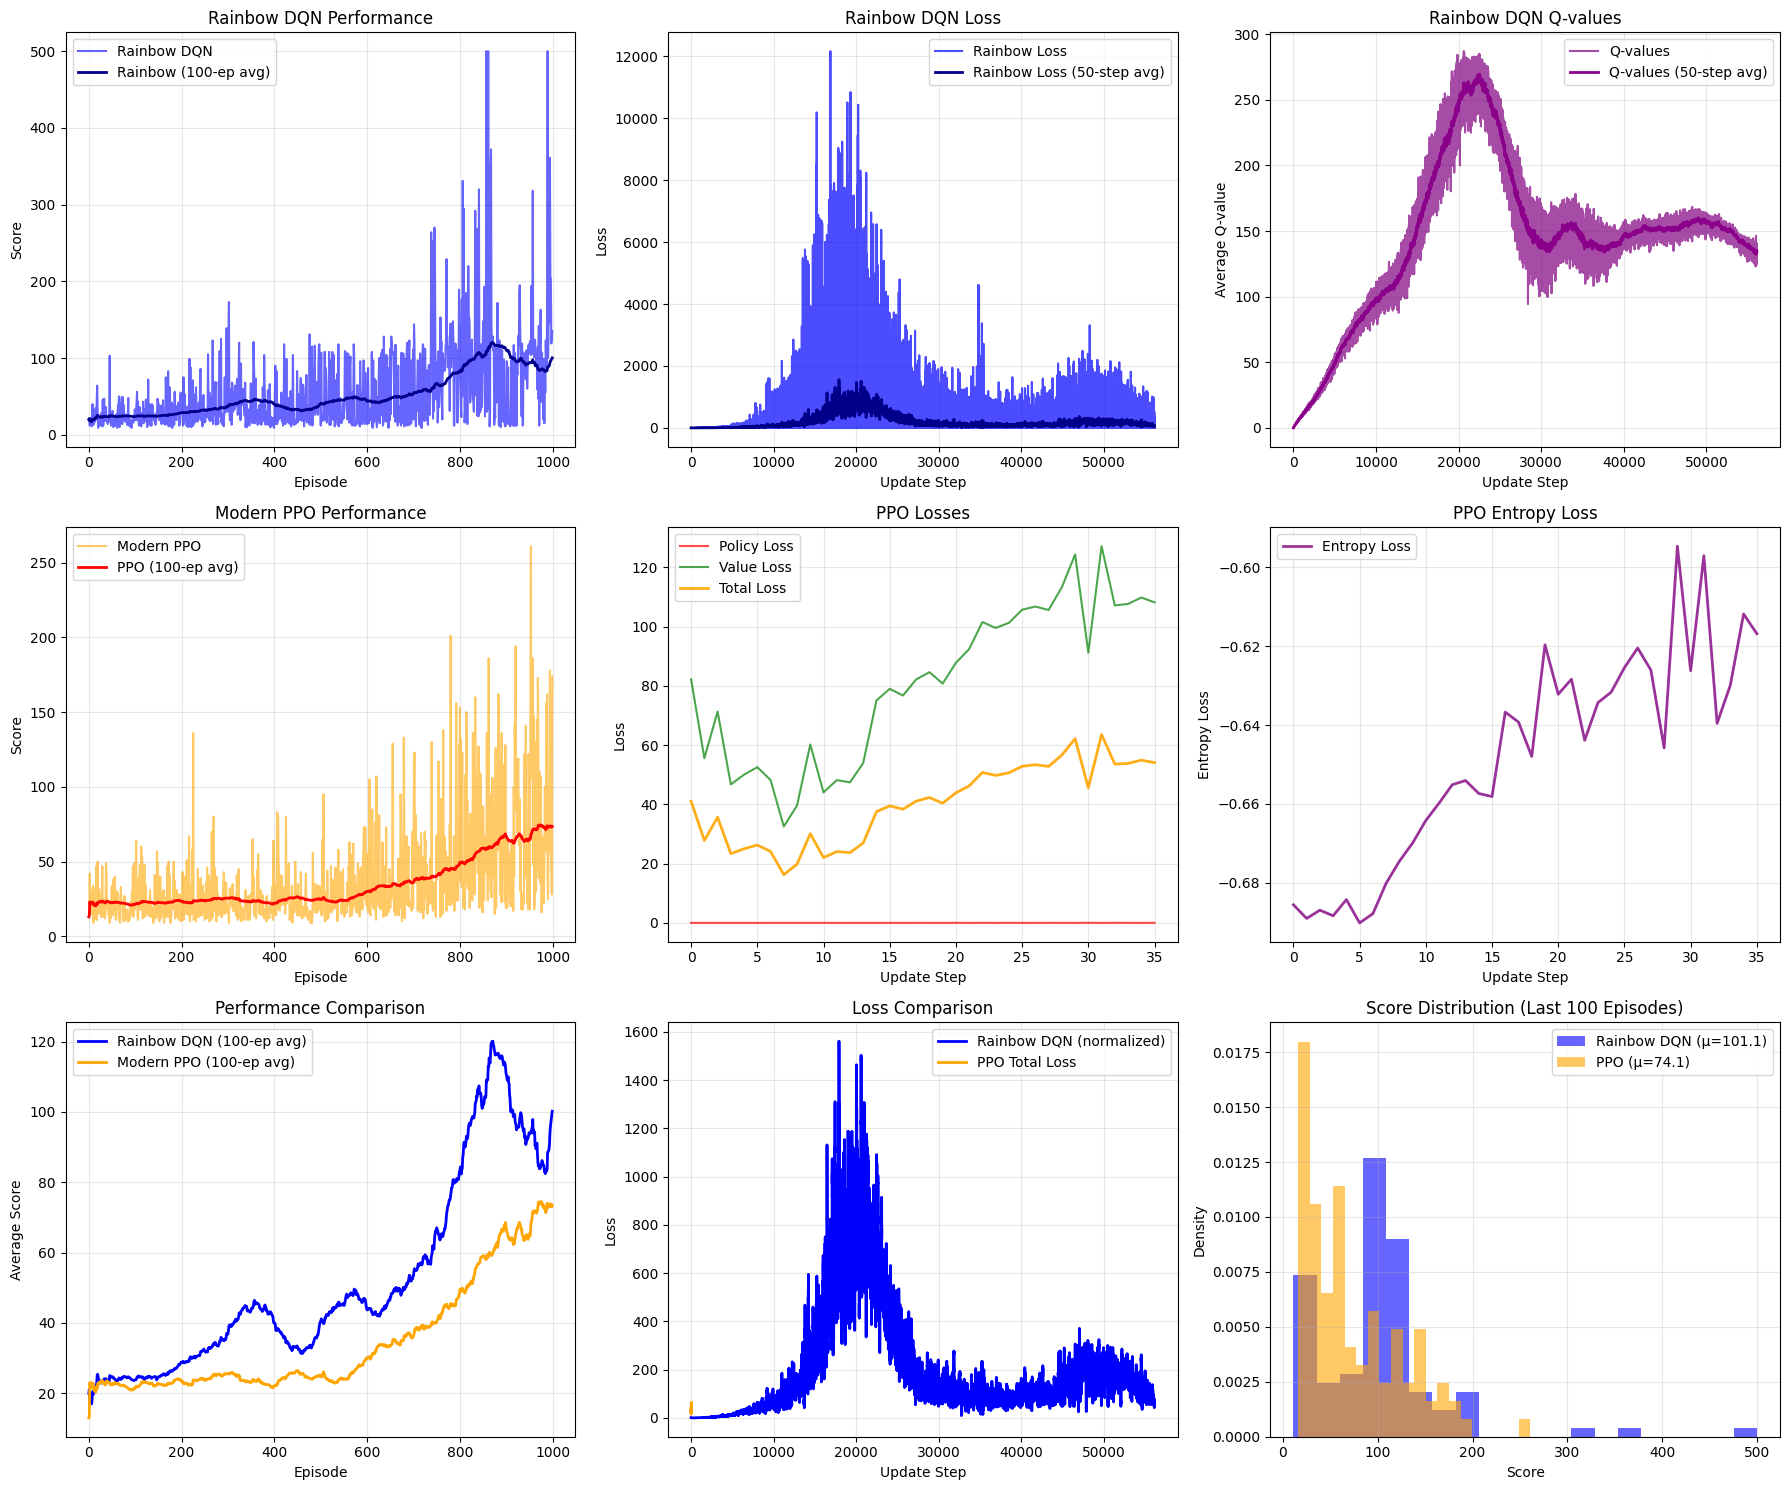


FINAL COMPARISON RESULTS
Environment: CartPole-v1
Device: cuda
Episodes: 1000

Model Architecture:
  Rainbow DQN Parameters: 4,675
  Modern PPO Parameters: 4,675
  Parameter Ratio (Rainbow/PPO): 1.0x

Hyperparameters:
  Rainbow DQN:
    - Batch Size: 32
    - Learning Rate: 0.001
    - Atoms: 51
    - Memory Capacity: 10,000
    - Warmup Steps: 200
  Modern PPO:
    - Mini-batch Size: 64
    - Learning Rate: 0.0003
    - Update Frequency: 1024
    - PPO Epochs: 4

Performance (last 100 episodes):
  Rainbow DQN Average Score: 101.10
  Modern PPO Average Score: 74.07
  Performance Difference: -27.03

Training Time:
  Rainbow DQN Training Time: 95.22 seconds
  Modern PPO Training Time: 17.71 seconds
  Time Difference: 77.51 seconds
  Faster Algorithm: Modern PPO

Loss Statistics:
  Rainbow DQN:
    - Final Loss: 1.0156
    - Average Loss: 204.1611
    - Total Updates: 56,109
  Modern PPO:
    - Final Total Loss: 54.0794
    - Final Policy Loss: 0.0050
    - Final Value Loss: 108.1611
   

In [9]:
# Plot comparison with losses - reorganized layout
plt.figure(figsize=(18, 15))

# Row 1: Rainbow DQN plots
plt.subplot(3, 3, 1)
plt.plot(rainbow_scores, alpha=0.6, label='Rainbow DQN', color='blue')
plt.plot([np.mean(rainbow_scores[max(0, i-100):i+1]) for i in range(len(rainbow_scores))], 
         label='Rainbow (100-ep avg)', color='darkblue', linewidth=2)
plt.title('Rainbow DQN Performance')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 2)
if len(rainbow_agent.losses) > 0:
    plt.plot(rainbow_agent.losses, alpha=0.7, color='blue', label='Rainbow Loss')
    # Smooth the loss curve
    if len(rainbow_agent.losses) > 50:
        smooth_loss = [np.mean(rainbow_agent.losses[max(0, i-50):i+1]) for i in range(len(rainbow_agent.losses))]
        plt.plot(smooth_loss, color='darkblue', linewidth=2, label='Rainbow Loss (50-step avg)')
plt.title('Rainbow DQN Loss')
plt.xlabel('Update Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 3)
if len(rainbow_agent.q_values) > 0:
    plt.plot(rainbow_agent.q_values, alpha=0.7, color='purple', label='Q-values')
    # Smooth the Q-values curve
    if len(rainbow_agent.q_values) > 50:
        smooth_q = [np.mean(rainbow_agent.q_values[max(0, i-50):i+1]) for i in range(len(rainbow_agent.q_values))]
        plt.plot(smooth_q, color='darkmagenta', linewidth=2, label='Q-values (50-step avg)')
plt.title('Rainbow DQN Q-values')
plt.xlabel('Update Step')
plt.ylabel('Average Q-value')
plt.legend()
plt.grid(True, alpha=0.3)

# Row 2: PPO plots
plt.subplot(3, 3, 4)
plt.plot(ppo_scores, alpha=0.6, label='Modern PPO', color='orange')
plt.plot([np.mean(ppo_scores[max(0, i-100):i+1]) for i in range(len(ppo_scores))], 
         label='PPO (100-ep avg)', color='red', linewidth=2)
plt.title('Modern PPO Performance')
plt.xlabel('Episode')
plt.ylabel('Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 5)
if len(ppo_agent.total_losses) > 0:
    plt.plot(ppo_agent.policy_losses, alpha=0.7, color='red', label='Policy Loss')
    plt.plot(ppo_agent.value_losses, alpha=0.7, color='green', label='Value Loss')
    plt.plot(ppo_agent.total_losses, alpha=0.9, color='orange', linewidth=2, label='Total Loss')
plt.title('PPO Losses')
plt.xlabel('Update Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 6)
if len(ppo_agent.total_losses) > 0:
    plt.plot(ppo_agent.entropy_losses, alpha=0.8, color='purple', linewidth=2, label='Entropy Loss')
plt.title('PPO Entropy Loss')
plt.xlabel('Update Step')
plt.ylabel('Entropy Loss')
plt.legend()
plt.grid(True, alpha=0.3)

# Row 3: Comparison plots
plt.subplot(3, 3, 7)
rainbow_avg = [np.mean(rainbow_scores[max(0, i-100):i+1]) for i in range(len(rainbow_scores))]
ppo_avg = [np.mean(ppo_scores[max(0, i-100):i+1]) for i in range(len(ppo_scores))]

plt.plot(rainbow_avg, label='Rainbow DQN (100-ep avg)', linewidth=2, color='blue')
plt.plot(ppo_avg, label='Modern PPO (100-ep avg)', linewidth=2, color='orange')
plt.title('Performance Comparison')
plt.xlabel('Episode')
plt.ylabel('Average Score')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 8)
# Loss comparison (if both have losses)
if len(rainbow_agent.losses) > 0 and len(ppo_agent.total_losses) > 0:
    # Normalize losses for comparison since they're different scales
    rainbow_loss_norm = np.array(rainbow_agent.losses)
    if len(rainbow_agent.losses) > 50:
        rainbow_loss_smooth = [np.mean(rainbow_agent.losses[max(0, i-50):i+1]) for i in range(len(rainbow_agent.losses))]
        plt.plot(rainbow_loss_smooth, label='Rainbow DQN (normalized)', color='blue', linewidth=2)
    
    ppo_loss_norm = np.array(ppo_agent.total_losses)
    plt.plot(ppo_agent.total_losses, label='PPO Total Loss', color='orange', linewidth=2)
plt.title('Loss Comparison')
plt.xlabel('Update Step')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 3, 9)
# Final scores distribution
rainbow_final = rainbow_scores[-100:]
ppo_final = ppo_scores[-100:]

plt.hist(rainbow_final, alpha=0.6, label=f'Rainbow DQN (μ={np.mean(rainbow_final):.1f})', 
         color='blue', bins=20, density=True)
plt.hist(ppo_final, alpha=0.6, label=f'PPO (μ={np.mean(ppo_final):.1f})', 
         color='orange', bins=20, density=True)
plt.title('Score Distribution (Last 100 Episodes)')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Final results with complete information
print(f"\n{'='*80}")
print(f"FINAL COMPARISON RESULTS")
print(f"{'='*80}")

# Model Information
rainbow_params = count_parameters(rainbow_agent.q_network)
ppo_params = count_parameters(ppo_agent.network)

print(f"Environment: {CONFIG['environment']}")
print(f"Device: {device}")
print(f"Episodes: {CONFIG['episodes']}")

print(f"\nModel Architecture:")
print(f"  Rainbow DQN Parameters: {rainbow_params:,}")
print(f"  Modern PPO Parameters: {ppo_params:,}")
print(f"  Parameter Ratio (Rainbow/PPO): {rainbow_params/ppo_params:.1f}x")

print(f"\nHyperparameters:")
print(f"  Rainbow DQN:")
print(f"    - Batch Size: {CONFIG['rainbow']['batch_size']}")
print(f"    - Learning Rate: {CONFIG['rainbow']['lr']}")
print(f"    - Atoms: {CONFIG['rainbow']['num_atoms']}")
print(f"    - Memory Capacity: {CONFIG['rainbow']['memory_capacity']:,}")
print(f"    - Warmup Steps: {CONFIG['rainbow']['warmup_steps']:,}")
print(f"  Modern PPO:")
print(f"    - Mini-batch Size: {CONFIG['ppo']['mini_batch_size']}")
print(f"    - Learning Rate: {CONFIG['ppo']['lr']}")
print(f"    - Update Frequency: {CONFIG['ppo']['update_frequency']}")
print(f"    - PPO Epochs: {CONFIG['ppo']['ppo_epochs']}")

print(f"\nPerformance (last 100 episodes):")
print(f"  Rainbow DQN Average Score: {np.mean(rainbow_scores[-100:]):.2f}")
print(f"  Modern PPO Average Score: {np.mean(ppo_scores[-100:]):.2f}")
print(f"  Performance Difference: {np.mean(ppo_scores[-100:]) - np.mean(rainbow_scores[-100:]):+.2f}")

print(f"\nTraining Time:")
print(f"  Rainbow DQN Training Time: {rainbow_time:.2f} seconds")
print(f"  Modern PPO Training Time: {ppo_time:.2f} seconds")
print(f"  Time Difference: {abs(rainbow_time - ppo_time):.2f} seconds")
print(f"  Faster Algorithm: {'Rainbow DQN' if rainbow_time < ppo_time else 'Modern PPO'}")

# Loss Statistics
print(f"\nLoss Statistics:")
if len(rainbow_agent.losses) > 0:
    print(f"  Rainbow DQN:")
    print(f"    - Final Loss: {rainbow_agent.losses[-1]:.4f}")
    print(f"    - Average Loss: {np.mean(rainbow_agent.losses):.4f}")
    print(f"    - Total Updates: {len(rainbow_agent.losses):,}")
if len(ppo_agent.total_losses) > 0:
    print(f"  Modern PPO:")
    print(f"    - Final Total Loss: {ppo_agent.total_losses[-1]:.4f}")
    print(f"    - Final Policy Loss: {ppo_agent.policy_losses[-1]:.4f}")
    print(f"    - Final Value Loss: {ppo_agent.value_losses[-1]:.4f}")
    print(f"    - Total Updates: {len(ppo_agent.total_losses):,}")

# Algorithm features summary
print(f"\n{'='*80}")
print(f"ALGORITHM FEATURES IMPLEMENTED")
print(f"{'='*80}")

# Rainbow DQN features
rainbow_features = [k.replace('use_', '') for k, v in CONFIG['rainbow'].items() if k.startswith('use_') and v]
print("Rainbow DQN:")
for feature in rainbow_features:
    print(f"  ✅ {feature.replace('_', ' ').title()}")

print("\nModern PPO:")
ppo_features = [k.replace('use_', '') for k, v in CONFIG['ppo'].items() if k.startswith('use_') and v]
for feature in ppo_features:
    print(f"  ✅ {feature.replace('_', ' ').title()}")